# Información y Programación Financiera, TI, Algoritmos y Ciencia de Datos

Neftalí Valdez

<a href="http://twitter.com/neftalivldz" target="_blank">@neftalivldz</a> | <a href="mailto:nvaldez@tec.mx">nvaldez@tec.mx</a>

In [1]:
#!pip3 install eikon
#!pip3 install cufflinks
#!pip3 install seaborn

# Importar librerías

In [1]:
import eikon as ek  # the Eikon Python wrapper package
import numpy as np  # NumPy
import pandas as pd  # pandas
import cufflinks as cf  # Cufflinks
import configparser as cp
cf.set_config_file(offline=True)  # set the plotting mode to offline

In [2]:
# Se inicia la conexión a refinitiv mediante eikon 

In [3]:
cfg = cp.ConfigParser()
cfg.read('../refinitiv.cfg')
ek.set_app_key(cfg['eikon']['app_id'])

In [4]:
!pwd

/Users/neftalivaldez/app/tec/finanzas2024


### Numpy

In [5]:
# Python program to demonstrate
# basic array characteristics
import numpy as np
 
# Creating array object
arr = np.array( [[ 1, 2, 3],
                 [ 4, 2, 5]] )
 
# Printing type of arr object
print("Array is of type: ", type(arr))
 
# Printing array dimensions (axes)
print("No. of dimensions: ", arr.ndim)
 
# Printing shape of array
print("Shape of array: ", arr.shape)
 
# Printing size (total number of elements) of array
print("Size of array: ", arr.size)
 
# Printing type of elements in array
print("Array stores elements of type: ", arr.dtype)

Array is of type:  <class 'numpy.ndarray'>
No. of dimensions:  2
Shape of array:  (2, 3)
Size of array:  6
Array stores elements of type:  int64


## Python Pandas

In [6]:
import pandas as pd 

data = {
  "sesion": [420, 380, 390],
  "asistencia": [25, 20, 27]
}

#load data into a DataFrame object:
df = pd.DataFrame(data)

df

,sesion,asistencia
0,420,25
1,380,20
2,390,27


In [7]:
#utilización de índice:
print(df.loc[2])

sesion        390
asistencia     27
Name: 2, dtype: int64


In [8]:
df = pd.DataFrame(data, index = ["dia1", "dia2", "dia3"])

df 

,sesion,asistencia
dia1,420,25
dia2,380,20
dia3,390,27


In [9]:
df

,sesion,asistencia
dia1,420,25
dia2,380,20
dia3,390,27


# Refinitiv Python

# Extracción de datos estructurados

Las funciones básicas para extraer datos de eikon son las siguiente:
- get_symbology
- get_data
- get_timeseries

get_symbology(symbol, from_symbol_type='RIC', to_symbol_type=None, raw_output=False, debug=False, bestMatch=True)
Devuelve una lista de nombre de instrumentos convertiods en el código del intrumento.

get_data(instruments, fields, parameters=None, field_name=False, raw_output=False, debug=False)
Devuelve un dataframe de pandas con campos en columnas e intrumentos como índice de renglones.

get_timeseries(rics, fields='*', start_date=None, end_date=None, interval='daily', count=None, calendar=None, corax=None, normalize=False, raw_output=False, debug=False)
Devuelve series históricas de uno o varios RICs.
<br>
Referencia: https://docs-developers.refinitiv.com/1594387995587/14684/book/en/eikon/index.html
RICs Reuters instrument code

# Obtener datos

In [10]:
data, err = ek.get_data(["SPOT.K", "IBM", "GOOG.O", "MSFT.O"], ["TR.PriceClose", "TR.Volume", "TR.PriceLow", "TR.TotalReturnYTD"])

In [11]:
data

,Instrument,Price Close,Volume,Price Low,YTD Total Return
0,SPOT.K,246.25,1548596,243.38,31.046778
1,IBM,187.64,4842840,185.9452,15.762478
2,GOOG.O,141.76,21865118,141.52,0.588945
3,MSFT.O,404.06,22296495,403.44,7.648137


In [12]:
type(data)

pandas.core.frame.DataFrame

In [13]:
data.index

RangeIndex(start=0, stop=4, step=1)

# Obtener datos de un índice

In [19]:
dax = ek.get_data('0#.GDAXI', fields=['TR.CommonName', 'TR.PriceClose',
                                      'TR.Volume', 'TR.TotalReturnYTD'])[0]

In [20]:
dax

,Instrument,Company Common Name,Price Close,Volume,YTD Total Return
0,BASFn.DE,BASF SE,45.775,1323167,-4.489545
1,IFXGn.DE,Infineon Technologies AG,33.14,1555069,-11.481481
2,SIEGn.DE,Siemens AG,169.58,910529,2.41588
3,EONGn.DE,E ON SE,11.84,2796552,-3.251029
4,DBKGn.DE,Deutsche Bank AG,11.996,2808687,-3.089615
5,SATG_p.DE,Sartorius AG,331.6,72514,1.35054
6,SAPG.DE,Sap Se,164.24,645852,18.353886
7,BAYGn.DE,Bayer AG,28.9,3542983,-14.927148
8,RWEG.DE,RWE AG,31.21,2678347,-22.778048
9,1COV.DE,Covestro AG,46.98,424358,-8.561124


In [21]:
dax[0:5]

,Instrument,Company Common Name,Price Close,Volume,YTD Total Return
0,BASFn.DE,BASF SE,45.775,1323167,-4.489545
1,IFXGn.DE,Infineon Technologies AG,33.14,1555069,-11.481481
2,SIEGn.DE,Siemens AG,169.58,910529,2.41588
3,EONGn.DE,E ON SE,11.84,2796552,-3.251029
4,DBKGn.DE,Deutsche Bank AG,11.996,2808687,-3.089615


In [22]:
dax.set_index('Instrument')['YTD Total Return']

Instrument
BASFn.DE     -4.489545
IFXGn.DE    -11.481481
SIEGn.DE       2.41588
EONGn.DE     -3.251029
DBKGn.DE     -3.089615
SATG_p.DE      1.35054
SAPG.DE      18.353886
BAYGn.DE    -14.927148
RWEG.DE     -22.778048
1COV.DE      -8.561124
HNKG_p.DE    -3.458688
ZALG.DE      -7.599068
DTEGn.DE           2.0
MRCG.DE       8.049965
PSHG_p.DE     2.482729
VOWG_p.DE     7.030411
BMWG.DE       3.294304
BEIG.DE       1.142225
HEIG.DE       5.411416
RHMG.DE      35.261324
MTXGn.DE     16.261204
FREG.DE      -5.806911
DHLn.DE      -4.759782
ALVG.DE       2.128539
MUVGn.DE      8.957611
CONG.DE       0.182007
SHLG.DE       4.714829
SY1G.DE       -1.68607
ADSGn.DE     -4.300608
HNRGn.DE      5.779011
DTGGe.DE      4.497354
ENR1n.DE     15.791667
MBGn.DE       7.721823
BNRGn.DE     -3.484739
CBKG.DE       0.557621
AIRG.DE       4.411765
VNAn.DE      -6.587246
DB1Gn.DE      0.616622
QIA.DE        1.340858
P911_p.DE     0.901126
Name: YTD Total Return, dtype: Float64

In [23]:
dax.set_index('Instrument')['YTD Total Return'].sort_values().iplot(kind='bar', color='blue')

generen grafico para volumen de menor a mayor DJI

In [25]:
lp4 = ek.get_data('LP40065886', ['TR.FundHoldingRIC','TR.FundHoldingName',
                           'TR.FundPercentageOfFundAssets',
                           'TR.FundNumberOfShares',
                           'TR.FundNumberOfSharesChanged'],
            {'Endnum':'5000'})[0]

In [26]:
lp4

,Instrument,Holding RIC,Holding Name,Percentage of Fund Assets,Number of Shares,Number of Shares Changed
0,LP40065886,MSFT.OQ,MICROSOFT CORP ORD,6.2948,5010898.0,29309.0
1,LP40065886,AAPL.OQ,APPLE INC ORD,5.8043,9962101.0,58523.0
2,LP40065886,NVDA.OQ,NVIDIA CORP ORD,3.0757,1582120.0,9323.0
3,LP40065886,AMZN.OQ,AMAZON.COM INC ORD,3.0752,6271046.0,36710.0
4,LP40065886,META.OQ,META PLATFORMS INC ORD,1.8449,1496643.0,8861.0
...,...,...,...,...,...,...
3368,LP40065886,,NEXT BRIDGE HYDROCARBONS INC,0.0,49663.0,0.0
3369,LP40065886,,CARISMA THERAPEUTICS INC CVR,0.0,143290.0,0.0
3370,LP40065886,,GCI LIBERTY INC ESCROW SHARES,0.0,82371.0,0.0
3371,LP40065886,,SPECTRUM PHARMACEUTICALS INC CVR,0.0,109299.0,0.0


In [27]:
dax.set_index('Instrument')['YTD Total Return'].sort_values().iplot(kind='bar', color='blue')

In [28]:
f = [[1, 2], [2, 3]]

In [29]:
print(f)

[[1, 2], [2, 3]]


In [30]:
XLE= ek.get_data('XLE', ['TR.FundHoldingRIC','TR.FundHoldingName', 'TR.FundPercentageOfFundAssets',
                           'TR.FundNumberOfShares', 'TR.FundNumberOfSharesChanged'],
            {'Endnum':'5000'})[0]

In [31]:
XLE

,Instrument,Holding RIC,Holding Name,Percentage of Fund Assets,Number of Shares,Number of Shares Changed
0,XLE,XOM.N,EXXON MOBIL CORP ORD,23.1747,81790606.0,747838.0
1,XLE,CVX.N,CHEVRON CORP ORD,17.4105,42849825.0,391790.0
2,XLE,COP.N,CONOCOPHILLIPS ORD,8.9353,28981520.0,264942.0
3,XLE,EOG.N,EOG RESOURCES INC ORD,4.4636,14233161.0,130068.0
4,XLE,SLB.N,SCHLUMBERGER NV ORD,4.3814,32644460.0,298466.0
5,XLE,PSX.N,PHILLIPS 66 ORD,4.3028,10818827.0,98965.0
6,XLE,MPC.N,MARATHON PETROLEUM CORP ORD,4.2613,9337025.0,85360.0
7,XLE,PXD.N,PIONEER NATURAL RESOURCES CO ORD,3.634,5737253.0,52504.0
8,XLE,VLO.N,VALERO ENERGY CORP ORD,3.2048,8371980.0,76611.0
9,XLE,WMB.N,WILLIAMS COMPANIES INC ORD,2.8575,29914459.0,273551.0


In [32]:
XLE.set_index('Holding RIC')['Number of Shares']

Holding RIC
XOM.N          81790606.0
CVX.N          42849825.0
COP.N          28981520.0
EOG.N          14233161.0
SLB.N          32644460.0
PSX.N          10818827.0
MPC.N           9337025.0
PXD.N           5737253.0
VLO.N           8371980.0
WMB.N          29914459.0
OKE.N          14325268.0
HES.N           6797872.0
OXY.N          16236699.0
KMI.N          47553722.0
HAL.N          22009918.0
BKR.OQ         24743956.0
FANG.OQ         4401392.0
DVN.N          15755239.0
TRGP.N          5483164.0
CTRA.N         18496916.0
EQT.N          10114969.0
MRO.N          14391582.0
APA.OQ          7542373.0
XAEH24           139200.0
LP40098642    90164858.93
               5874190.96
                     <NA>
Name: Number of Shares, dtype: Float64

In [33]:
XLE[(XLE['Holding RIC'] != '')].set_index('Holding RIC')['Number of Shares'].sort_values().iplot(kind='bar', color='blue')

In [34]:
help(ek.get_data)

Help on function get_data in module eikon.data_grid:

get_data(instruments, fields, parameters=None, field_name=False, raw_output=False, debug=False)
    Returns a pandas.DataFrame with fields in columns and instruments as row index
    
    Parameters
    ----------
    instruments: string or list
        Single instrument or list of instruments to request.
    
    fields: string, dictionary or list of strings and/or dictionaries.
        List of fields to request.
    
        Examples:
    
        - 'TR.PriceClose'
        - {'TR.GrossProfit': { 'params':{ 'Scale': 6, 'Curn': 'EUR' }}
        - {'TR.GrossProfit': { 'params':{ 'Scale': 6, 'Curn': 'EUR' },sort_dir:'desc'}
        - ['TR.PriceClose','TR.PriceOpen']
        - [{'TR.PriceClose':  {'sort_dir':asc,sort_priority:1}},{'TR.PriceOpen':  {'sort_dir':asc,sort_priority:0}}
        
        You can use the function TR_Field to build the fields:
    
        >>> fields = [ek.TR_Field('tr.revenue'),ek.TR_Field('tr.open','asc',1),e

# Descargar series de tiempo

In [35]:
#help(ek.get_timeseries)

In [36]:
import datetime as dt
today = dt.date.today()
d = today - dt.timedelta(days=100)
print(today, d)

2024-02-19 2023-11-11


In [37]:
df_ts = ek.get_timeseries(["000001.SZ"], 
                          start_date = "2016-06-14", 
                          end_date = "2016-06-20", 
                          interval="daily", 
                          corax = 'adjusted' )
df_ts

000001.SZ,HIGH,CLOSE,LOW,OPEN,VOLUME
Date,,,,,
2016-06-14,8.674997,8.666663,8.599997,8.616663,32836484.334594
2016-06-15,8.73333,8.699997,8.599997,8.60833,45380707.352283
2016-06-16,8.6,8.57,8.53,8.57,38667008.0
2016-06-17,8.61,8.58,8.54,8.57,31517300.0
2016-06-20,8.6,8.6,8.56,8.59,27073158.0


In [38]:
import datetime as dt
today = dt.datetime.today()
d = today - dt.timedelta(days=100)
print(today, d)

2024-02-19 15:22:07.679788 2023-11-11 15:22:07.679788


In [39]:
df_ts = ek.get_timeseries(["000001.SZ"], start_date = "2016-06-14", end_date = "2016-06-20", interval="daily", corax = 'unadjusted')
df_ts

000001.SZ,HIGH,CLOSE,LOW,OPEN,VOLUME
Date,,,,,
2016-06-14,10.41,10.4,10.32,10.34,27363726
2016-06-15,10.48,10.44,10.32,10.33,37817241
2016-06-16,8.6,8.57,8.53,8.57,38667008
2016-06-17,8.61,8.58,8.54,8.57,31517300
2016-06-20,8.6,8.6,8.56,8.59,27073158


In [40]:
df_ts = ek.get_timeseries(["MSFT.O"], start_date = d, end_date = today, interval="daily", corax = 'unadjusted')
df_ts

MSFT.O,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME
Date,,,,,,
2023-11-13,368.47,366.68,365.9,368.22,340608,19986506
2023-11-14,371.95,370.27,367.3454,371.01,409291,27683862
2023-11-15,373.13,369.67,367.11,371.28,399874,26860095
2023-11-16,376.35,376.17,370.18,370.96,405563,27182315
2023-11-17,374.37,369.85,367.0,373.61,560742,40325371
...,...,...,...,...,...,...
2024-02-12,420.74,415.26,414.75,420.555,401543,21202921
2024-02-13,410.071,406.32,403.39,404.94,544613,27824936
2024-02-14,409.84,409.49,404.57,408.07,384410,20401190


In [41]:
type(df_ts)

pandas.core.frame.DataFrame

In [42]:
df_ts.dtypes

MSFT.O
HIGH      Float64
CLOSE     Float64
LOW       Float64
OPEN      Float64
COUNT       Int64
VOLUME      Int64
dtype: object

In [43]:
#df_ts.values

In [44]:
df_ts['CLOSE']

Date
2023-11-13    366.68
2023-11-14    370.27
2023-11-15    369.67
2023-11-16    376.17
2023-11-17    369.85
               ...  
2024-02-12    415.26
2024-02-13    406.32
2024-02-14    409.49
2024-02-15    406.56
2024-02-16    404.06
Name: CLOSE, Length: 66, dtype: Float64

In [45]:
#podemos usar la seleccion boleeana dentro del pandas.DataFrame
df_ts[(df_ts['HIGH'] > 250)]

MSFT.O,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME
Date,,,,,,
2023-11-13,368.47,366.68,365.9,368.22,340608,19986506
2023-11-14,371.95,370.27,367.3454,371.01,409291,27683862
2023-11-15,373.13,369.67,367.11,371.28,399874,26860095
2023-11-16,376.35,376.17,370.18,370.96,405563,27182315
2023-11-17,374.37,369.85,367.0,373.61,560742,40325371
...,...,...,...,...,...,...
2024-02-12,420.74,415.26,414.75,420.555,401543,21202921
2024-02-13,410.071,406.32,403.39,404.94,544613,27824936
2024-02-14,409.84,409.49,404.57,408.07,384410,20401190


In [46]:
df_ts.index

DatetimeIndex(['2023-11-13', '2023-11-14', '2023-11-15', '2023-11-16',
               '2023-11-17', '2023-11-20', '2023-11-21', '2023-11-22',
               '2023-11-24', '2023-11-27', '2023-11-28', '2023-11-29',
               '2023-11-30', '2023-12-01', '2023-12-04', '2023-12-05',
               '2023-12-06', '2023-12-07', '2023-12-08', '2023-12-11',
               '2023-12-12', '2023-12-13', '2023-12-14', '2023-12-15',
               '2023-12-18', '2023-12-19', '2023-12-20', '2023-12-21',
               '2023-12-22', '2023-12-26', '2023-12-27', '2023-12-28',
               '2023-12-29', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-08', '2024-01-09', '2024-01-10',
               '2024-01-11', '2024-01-12', '2024-01-16', '2024-01-17',
               '2024-01-18', '2024-01-19', '2024-01-22', '2024-01-23',
               '2024-01-24', '2024-01-25', '2024-01-26', '2024-01-29',
               '2024-01-30', '2024-01-31', '2024-02-01', '2024-02-02',
      

In [47]:
today_date = dt.date.today()
d = today_date - dt.timedelta(days=12)
print(d)

2024-02-07


In [48]:
#Podemos seleccionar una sola fila, como lo haciamos en numpy, de la siguiente manera:
df_ts.iloc[1:4]

MSFT.O,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME
Date,,,,,,
2023-11-14,371.95,370.27,367.3454,371.01,409291,27683862
2023-11-15,373.13,369.67,367.11,371.28,399874,26860095
2023-11-16,376.35,376.17,370.18,370.96,405563,27182315


In [49]:
#El atributo pandas.DateFrame.loc nos permite indexar las filas en vez de las columnas
df_ts.loc[[d]]

MSFT.O,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME
Date,,,,,,
2024-02-07,414.3,414.05,407.4,407.44,352956,22340526


In [50]:
df_ts[-10:]

MSFT.O,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME
Date,,,,,,
2024-02-05,411.16,405.65,403.99,409.9,455599,25352286
2024-02-06,407.97,405.49,402.91,405.88,342464,18382624
2024-02-07,414.3,414.05,407.4,407.44,352956,22340526
2024-02-08,415.56,414.11,412.53,414.05,323852,21225257
2024-02-09,420.82,420.55,415.09,415.25,369747,22032844
2024-02-12,420.74,415.26,414.75,420.555,401543,21202921
2024-02-13,410.071,406.32,403.39,404.94,544613,27824936
2024-02-14,409.84,409.49,404.57,408.07,384410,20401190
2024-02-15,409.13,406.56,404.29,408.14,412617,21825525


# Estadística básica

In [51]:
dax_corto = dax['Instrument'][0:10].tolist()
dax_corto

['BASFn.DE',
 'IFXGn.DE',
 'SIEGn.DE',
 'EONGn.DE',
 'DBKGn.DE',
 'SATG_p.DE',
 'SAPG.DE',
 'BAYGn.DE',
 'RWEG.DE',
 '1COV.DE']

In [52]:
today = dt.datetime.today()
d = today - dt.timedelta(days=100)
print(today, d)

2024-02-19 15:22:21.923331 2023-11-11 15:22:21.923331


In [53]:
df = ek.get_timeseries(dax_corto, start_date = d, end_date = today, fields='CLOSE', interval="daily")
df

CLOSE,BASFn.DE,IFXGn.DE,SIEGn.DE,EONGn.DE,DBKGn.DE,SATG_p.DE,SAPG.DE,BAYGn.DE,RWEG.DE,1COV.DE
Date,,,,,,,,,,
2023-11-13,44.085,29.625,132.9,11.31,10.606,246.7,135.42,40.25,36.31,47.15
2023-11-14,44.75,30.605,136.56,11.43,10.724,266.5,136.26,40.64,37.66,48.12
2023-11-15,45.045,33.57,138.9,11.285,10.92,273.0,137.26,41.09,38.02,48.6
2023-11-16,43.93,33.96,146.82,11.515,10.886,269.1,136.44,40.6,38.23,48.5
2023-11-17,44.285,33.58,148.46,11.555,11.172,273.8,137.22,41.45,38.34,48.0
...,...,...,...,...,...,...,...,...,...,...
2024-02-13,45.06,32.565,163.68,11.875,11.876,329.9,162.76,27.91,32.19,48.7
2024-02-14,45.57,32.995,165.04,11.77,11.93,329.4,164.88,28.07,31.84,48.75
2024-02-15,46.085,33.34,167.0,11.855,12.012,331.6,164.38,28.055,32.08,48.78


In [54]:
df.describe()

CLOSE,BASFn.DE,IFXGn.DE,SIEGn.DE,EONGn.DE,DBKGn.DE,SATG_p.DE,SAPG.DE,BAYGn.DE,RWEG.DE,1COV.DE
count,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0,68.0
mean,45.289191,34.880662,160.933235,12.171985,11.865588,313.25,148.333824,32.420956,37.788088,49.655441
std,1.810791,1.915444,8.328542,0.362951,0.511974,24.723,10.558682,3.165261,3.122013,1.993049
min,42.685,29.625,132.9,11.285,10.606,246.7,135.42,27.745,31.21,46.98
25%,43.9975,33.595,158.89,11.95375,11.569,294.425,139.79,30.72625,35.8375,48.09
50%,44.8,34.31,163.0,12.225,11.939,315.75,144.84,32.39,38.35,48.92
75%,46.21125,36.20875,167.235,12.4525,12.2125,335.025,160.76,33.57,40.5275,51.25
max,49.07,38.915,169.92,12.785,12.826,349.3,168.32,41.45,41.74,53.74


In [55]:
correlacion = df[dax_corto].corr()
print(correlacion)

CLOSE      BASFn.DE  IFXGn.DE  SIEGn.DE  EONGn.DE  DBKGn.DE  SATG_p.DE   
CLOSE                                                                    
BASFn.DE   1.000000  0.623549  0.476446  0.221595  0.539773   0.632935  \
IFXGn.DE   0.623549  1.000000  0.450871  0.455913  0.431569   0.380223   
SIEGn.DE   0.476446  0.450871  1.000000  0.646819  0.789981   0.877070   
EONGn.DE   0.221595  0.455913  0.646819  1.000000  0.722990   0.471650   
DBKGn.DE   0.539773  0.431569  0.789981  0.722990  1.000000   0.739727   
SATG_p.DE  0.632935  0.380223  0.877070  0.471650  0.739727   1.000000   
SAPG.DE   -0.254333 -0.348004  0.510986  0.078676  0.187064   0.440902   
BAYGn.DE   0.057108 -0.068148 -0.652591 -0.261112 -0.307356  -0.590024   
RWEG.DE    0.359092  0.691313 -0.173539  0.280064  0.065250  -0.205760   
1COV.DE    0.804633  0.821001  0.339182  0.370119  0.446034   0.409469   

CLOSE       SAPG.DE  BAYGn.DE   RWEG.DE   1COV.DE  
CLOSE                                              
BASFn.D

<Axes: xlabel='CLOSE', ylabel='CLOSE'>

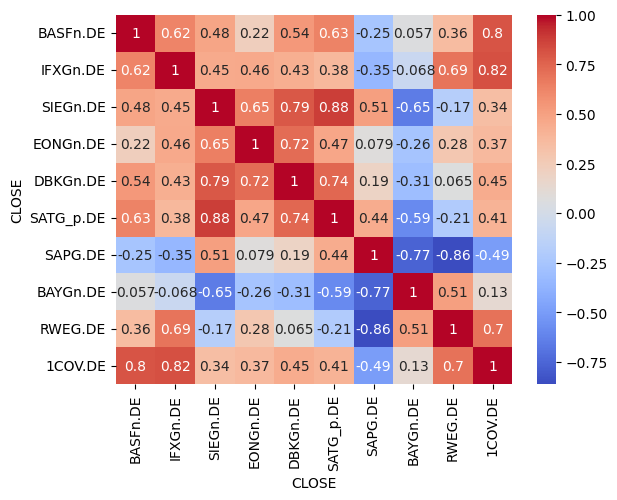

In [56]:
import seaborn as sns
sns.heatmap(df[dax_corto].corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

# Bibliografía

Python for Finance, 2nd Edition. December 2018 O'Reilly Media, Inc.
Numpy | ndarray Last Updated : 28 Jun, 2021 https://www.geeksforgeeks.org/numpy-ndarray/
Machine Learning for Trading, Tucker Balch, Arpan Chakraborty, Udacity. https://www.udacity.com/course/machine-learning-for-trading--ud501